# Binary Prediction with Rainfall Dataset

**Goal**: Build a robust classifier to predict daily rainfall using environmental data.

**Approach**: Ensemble of Random Forest, AdaBoost, and Logistic Regression with soft voting.

---

## Part 1: Data Loading & Exploratory Data Analysis (EDA)

This section handles:
- Loading training and test datasets
- Basic statistics and data quality checks
- Visualization of feature distributions
- Correlation analysis
- Class imbalance examination

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

import warnings
warnings.filterwarnings('ignore')

### 1.1 Load Data

In [5]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

print(f"Training data shape: {train_df.shape}")
print(f"Test data shape: {test_df.shape}")
print(f"\nTraining data has {train_df.shape[0]} samples with {train_df.shape[1]} features")
print(f"Test data has {test_df.shape[0]} samples with {test_df.shape[1] - 1} features (no target)")

Training data shape: (2190, 13)
Test data shape: (730, 12)

Training data has 2190 samples with 13 features
Test data has 730 samples with 11 features (no target)


### 1.2 Initial Data Inspection

In [7]:
print("First 5 rows of training data:")
display(train_df.head())

print("\nFirst 5 rows of test data:")
display(test_df.head())

First 5 rows of training data:


,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
1,1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2,2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1
3,3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1
4,4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0



First 5 rows of test data:


,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
0,2190,1,1019.5,17.5,15.8,12.7,14.9,96.0,99.0,0.0,50.0,24.3
1,2191,2,1016.5,17.5,16.5,15.8,15.1,97.0,99.0,0.0,50.0,35.3
2,2192,3,1023.9,11.2,10.4,9.4,8.9,86.0,96.0,0.0,40.0,16.9
3,2193,4,1022.9,20.6,17.3,15.2,9.5,75.0,45.0,7.1,20.0,50.6
4,2194,5,1022.2,16.1,13.8,6.4,4.3,68.0,49.0,9.2,20.0,19.4


In [8]:
print("Training data info:")
train_df.info()

print("\n" + "="*50)
print("\nTest data info:")
test_df.info()

Training data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190 entries, 0 to 2189
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2190 non-null   int64  
 1   day            2190 non-null   int64  
 2   pressure       2190 non-null   float64
 3   maxtemp        2190 non-null   float64
 4   temparature    2190 non-null   float64
 5   mintemp        2190 non-null   float64
 6   dewpoint       2190 non-null   float64
 7   humidity       2190 non-null   float64
 8   cloud          2190 non-null   float64
 9   sunshine       2190 non-null   float64
 10  winddirection  2190 non-null   float64
 11  windspeed      2190 non-null   float64
 12  rainfall       2190 non-null   int64  
dtypes: float64(10), int64(3)
memory usage: 222.6 KB


Test data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column         Non-Null Count  D

In [9]:
print("Missing values in training data:")
missing_train = train_df.isnull().sum()
print(missing_train)
print(f"\nTotal missing values: {missing_train.sum()}")

print("\n" + "="*50)
print("\nMissing values in test data:")
missing_test = test_df.isnull().sum()
print(missing_test)
print(f"\nTotal missing values: {missing_test.sum()}")

Missing values in training data:
id               0
day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    0
windspeed        0
rainfall         0
dtype: int64

Total missing values: 0


Missing values in test data:
id               0
day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    1
windspeed        0
dtype: int64

Total missing values: 1


### 1.3 Statistical Summary

In [11]:
print("Statistical Summary of Training Data:")
display(train_df.describe())

Statistical Summary of Training Data:


,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
count,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000
mean,1094.500000,179.948402,1013.602146,26.365799,23.953059,22.170091,20.454566,82.036530,75.721918,3.744429,104.863151,21.804703,0.753425
std,632.342866,105.203592,5.655366,5.654330,5.222410,5.059120,5.288406,7.800654,18.026498,3.626327,80.002416,9.898659,0.431116
min,0.000000,1.000000,999.000000,10.400000,7.400000,4.000000,-0.300000,39.000000,2.000000,0.000000,10.000000,4.400000,0.000000
25%,547.250000,89.000000,1008.600000,21.300000,19.300000,17.700000,16.800000,77.000000,69.000000,0.400000,40.000000,14.125000,1.000000
50%,1094.500000,178.500000,1013.000000,27.800000,25.500000,23.850000,22.150000,82.000000,83.000000,2.400000,70.000000,20.500000,1.000000
75%,1641.750000,270.000000,1017.775000,31.200000,28.400000,26.400000,25.000000,88.000000,88.000000,6.800000,200.000000,27.900000,1.000000
max,2189.000000,365.000000,1034.600000,36.000000,31.500000,29.800000,26.700000,98.000000,100.000000,12.100000,300.000000,59.500000,1.000000


### 1.4 Class Distribution & Imbalance Analysis

In [13]:
# check target variable distribution
rainfall_counts = train_df['rainfall'].value_counts()
rainfall_pcts = train_df['rainfall'].value_counts(normalize=True) * 100

print("Rainfall Class Distribution:")
print(rainfall_counts)
print(f"\nClass Percentages:")
print(f"Rain (1): {rainfall_pcts[1]:.2f}%")
print(f"No Rain (0): {rainfall_pcts[0]:.2f}%")
print(f"\nImbalance Ratio: {rainfall_counts[1] / rainfall_counts[0]:.2f}:1")
print("\n Significant class imbalance found. Will need to address with class_weight='balanced.'")

Rainfall Class Distribution:
rainfall
1    1650
0     540
Name: count, dtype: int64

Class Percentages:
Rain (1): 75.34%
No Rain (0): 24.66%

Imbalance Ratio: 3.06:1

 Significant class imbalance found. Will need to address with class_weight='balanced.'


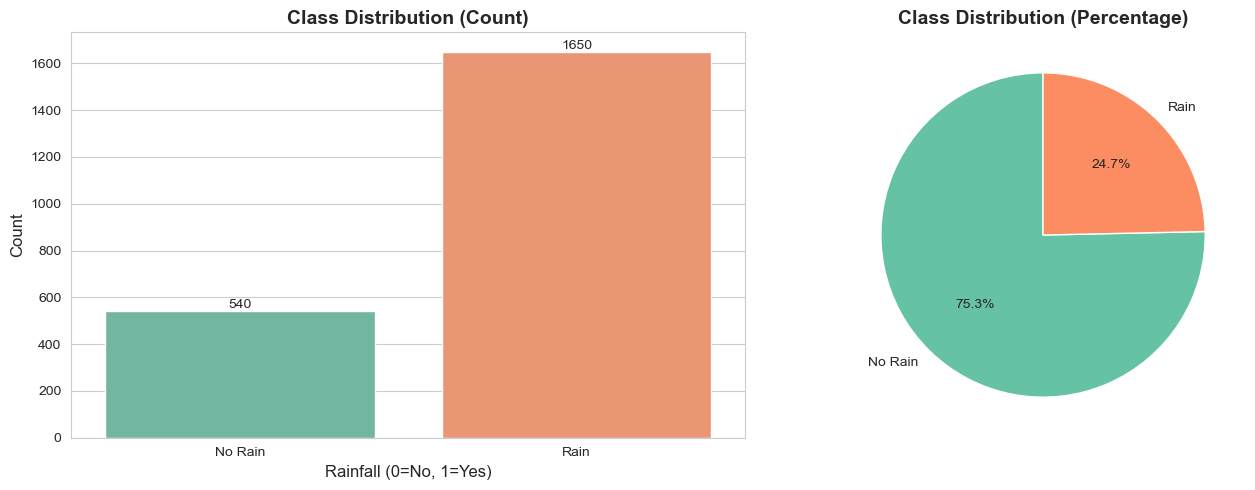

In [14]:
# visualize class distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# count plot
sns.countplot(data=train_df, x='rainfall', ax=axes[0], palette='Set2')
axes[0].set_title('Class Distribution (Count)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Rainfall (0=No, 1=Yes)', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].set_xticklabels(['No Rain', 'Rain'])

# add count labels on bars
for container in axes[0].containers:
    axes[0].bar_label(container)

# pie chart
axes[1].pie(rainfall_counts, labels=['No Rain', 'Rain'], autopct='%1.1f%%', 
            startangle=90, colors=sns.color_palette('Set2'))
axes[1].set_title('Class Distribution (Percentage)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

### 1.5 Feature Distribution Analysis

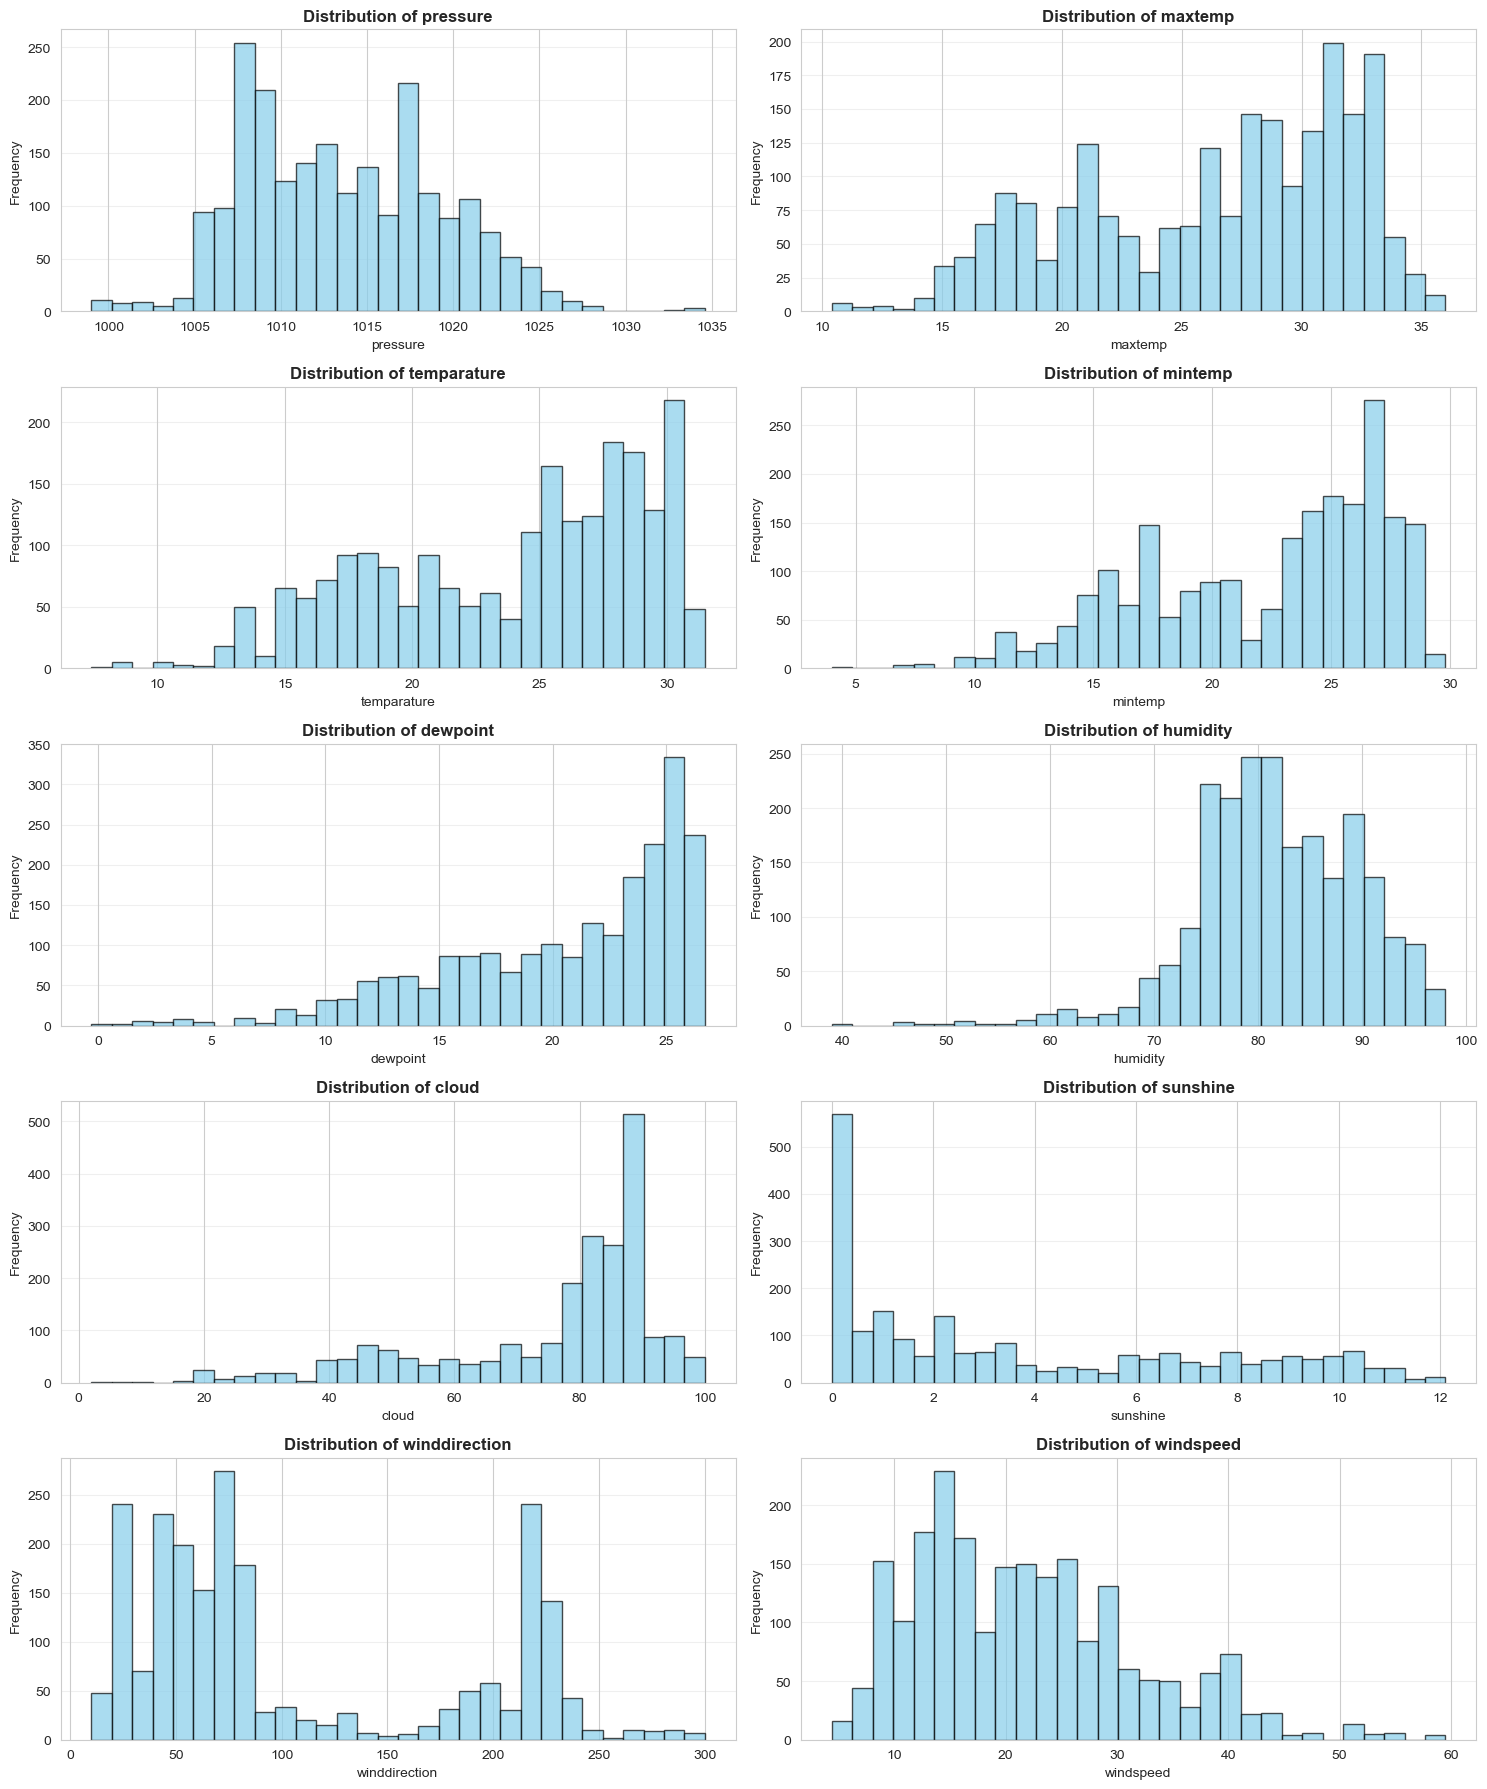

In [16]:
# exclude id, day, rainfall
feature_cols = ['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 
                'humidity', 'cloud', 'sunshine', 'winddirection', 'windspeed']

# plot distributions
fig, axes = plt.subplots(5, 2, figsize=(15, 18))
axes = axes.ravel()

for idx, col in enumerate(feature_cols):
    axes[idx].hist(train_df[col], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(col, fontsize=10)
    axes[idx].set_ylabel('Frequency', fontsize=10)
    axes[idx].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

### 1.6 Feature Distributions by Rainfall Class

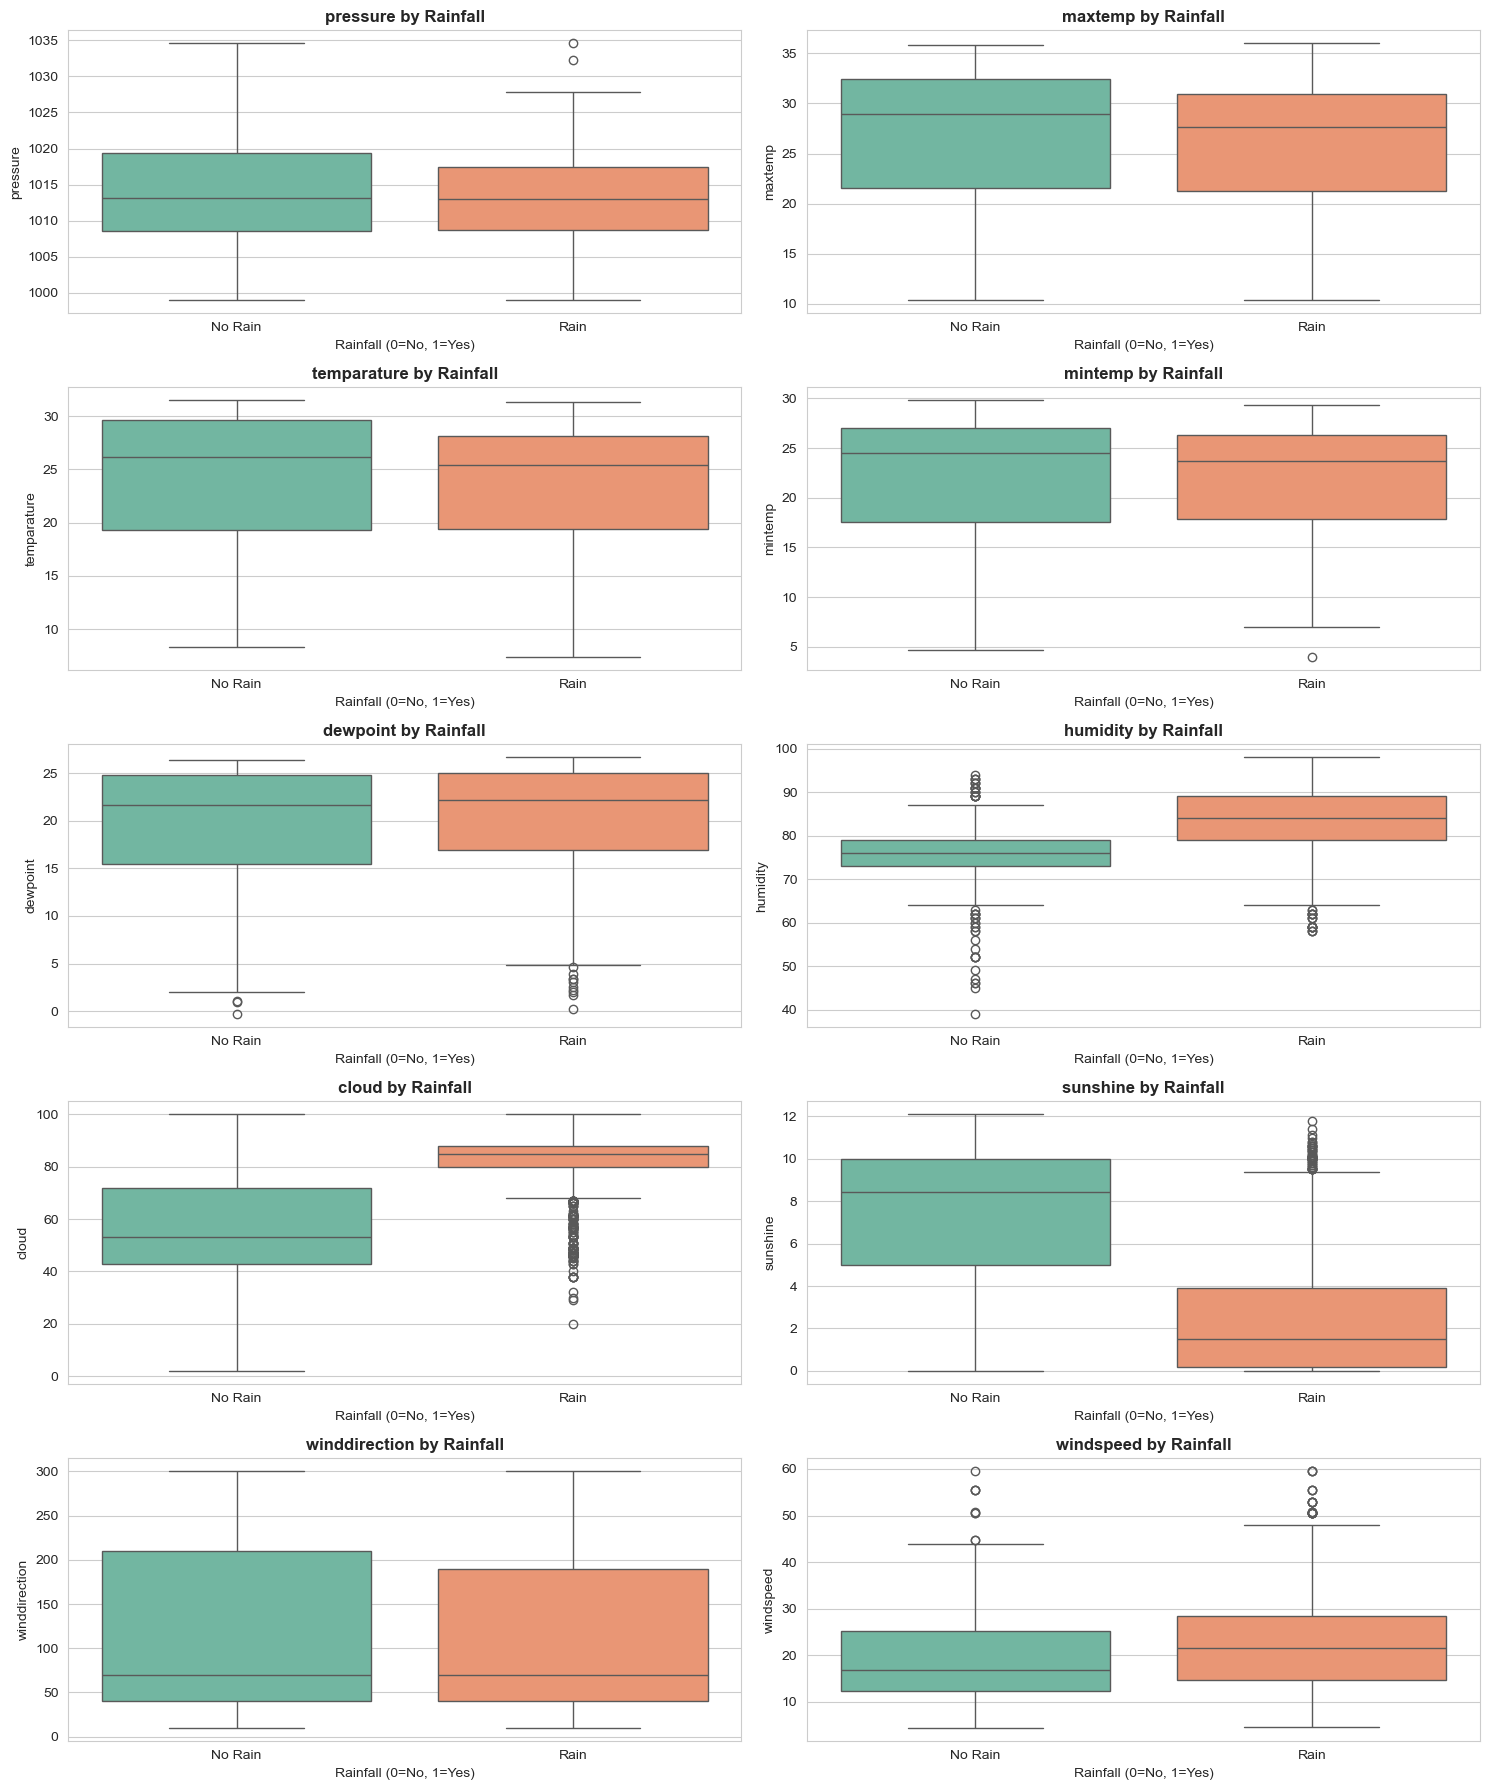

In [18]:
# box plots comparing feature distributions between rain, no-rain days
fig, axes = plt.subplots(5, 2, figsize=(15, 18))
axes = axes.ravel()

for idx, col in enumerate(feature_cols):
    sns.boxplot(data=train_df, x='rainfall', y=col, ax=axes[idx], palette='Set2')
    axes[idx].set_title(f'{col} by Rainfall', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Rainfall (0=No, 1=Yes)', fontsize=10)
    axes[idx].set_xticklabels(['No Rain', 'Rain'])

plt.tight_layout()
plt.show()

### 1.7 Correlation Analysis

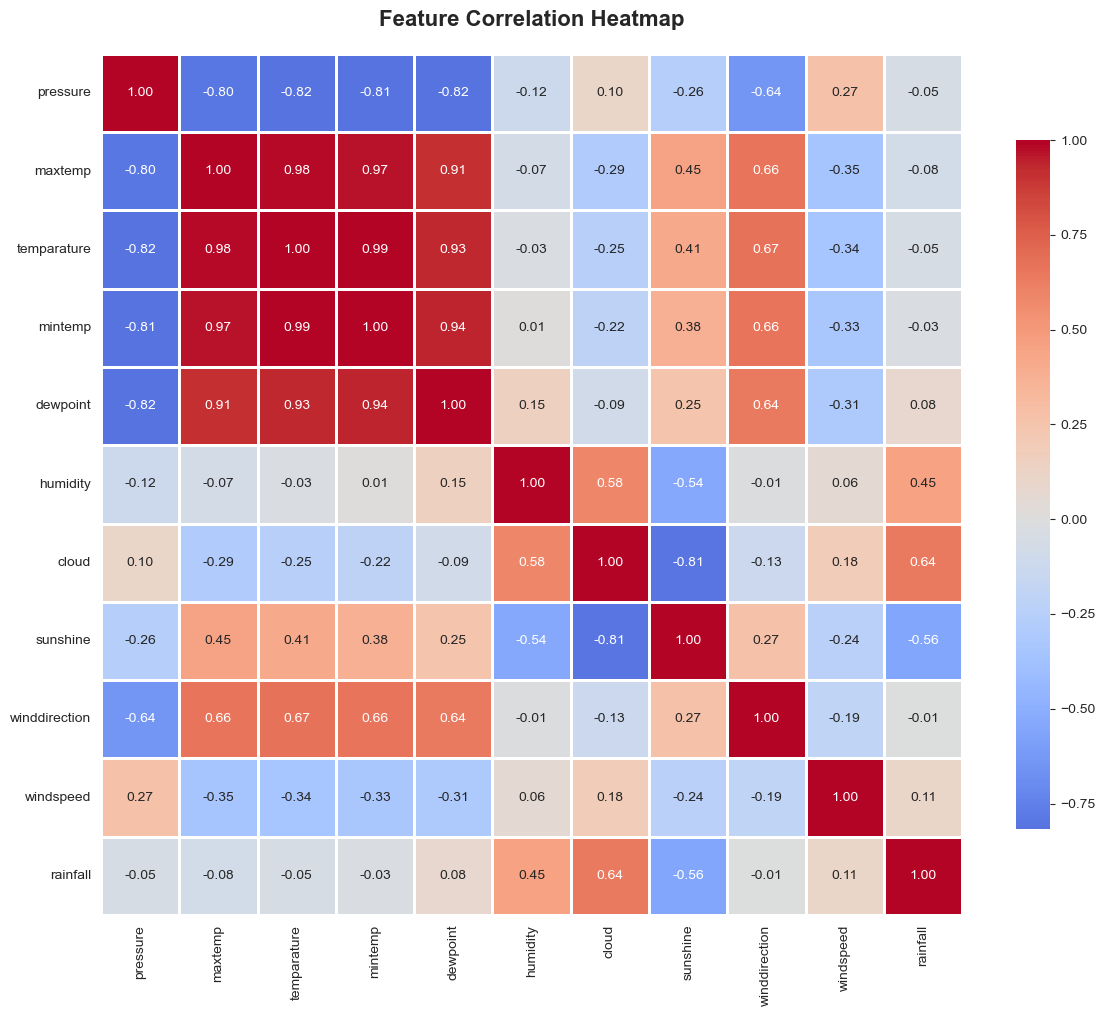

In [20]:
correlation_matrix = train_df[feature_cols + ['rainfall']].corr()

# visualize correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Heatmap', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

Features correlation with Rainfall (sorted):
cloud            0.641191
humidity         0.454213
windspeed        0.111625
dewpoint         0.081965
winddirection   -0.006939
mintemp         -0.026841
temparature     -0.049660
pressure        -0.049886
maxtemp         -0.079304
sunshine        -0.555287
Name: rainfall, dtype: float64


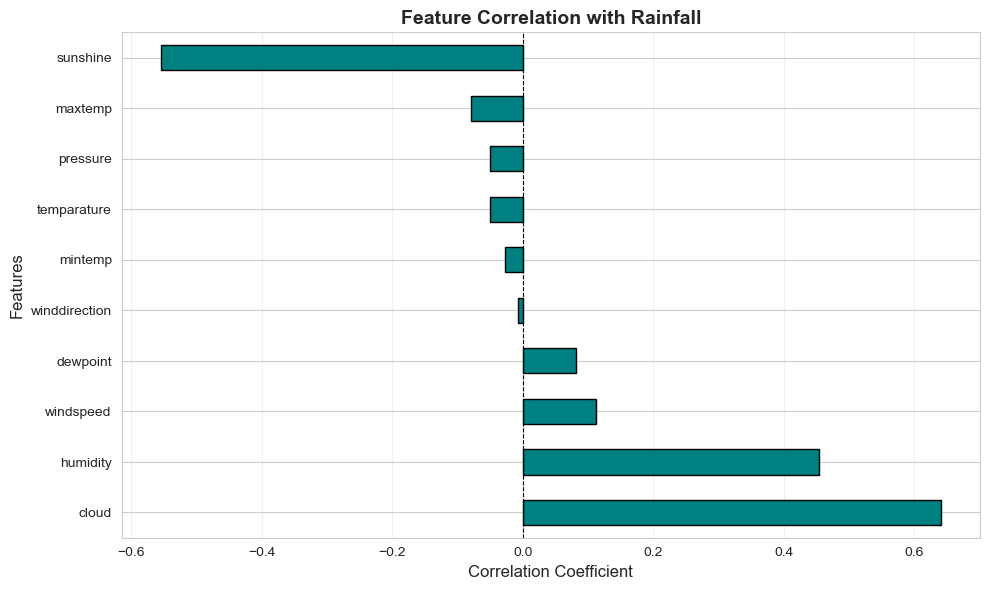

In [21]:
# features most correlated with rainfall
rainfall_corr = correlation_matrix['rainfall'].drop('rainfall').sort_values(ascending=False)

print("Features correlation with Rainfall (sorted):")
print(rainfall_corr)

# visualize
plt.figure(figsize=(10, 6))
rainfall_corr.plot(kind='barh', color='teal', edgecolor='black')
plt.title('Feature Correlation with Rainfall', fontsize=14, fontweight='bold')
plt.xlabel('Correlation Coefficient', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

### 1.8 Key Insights from EDA

**Summary of findings**:
- Dataset has 2190 training samples and 730 test samples
- Significant class imbalance: 75.3% rain vs 24.7% no rain
- Features show varying distributions and correlations with rainfall
- Strong multicollinearity expected between temperature variables (maxtemp, temparature, mintemp, dewpoint)

---

## Part 2: Data Preprocessing & Feature Engineering

This section handles:
- Dropping non-predictive features (id, day)
- Feature engineering (creating new features)
- Feature scaling (standardization)
- Train/validation split with stratification

### 2.1 Feature Engineering

In [25]:
def engineer_features(df):
    """
    Create new features from existing ones.
    
    Args:
        df: DataFrame with raw features
        
    Returns:
        DataFrame with engineered features added
    """
    df = df.copy()
    
    # temperature range (diurnal temperature variation)
    df['temp_range'] = df['maxtemp'] - df['mintemp']
    
    # dewpoint depression (how close air is to saturation)
    # lower values = air closer to saturation = more likely to rain
    df['dewpoint_depression'] = df['temparature'] - df['dewpoint']
    
    # temperature deviation from daily average
    df['temp_from_avg'] = df['temparature'] - (df['maxtemp'] + df['mintemp']) / 2
    
    # interaction: high humidity with low dewpoint depression
    df['humidity_dewpoint_interaction'] = df['humidity'] * (1 / (df['dewpoint_depression'] + 1))
    
    return df

print("Applying feature engineering...")
train_engineered = engineer_features(train_df)
test_engineered = engineer_features(test_df)

print(f"\nOriginal training features: {train_df.shape[1]}")
print(f"After feature engineering: {train_engineered.shape[1]}")
print(f"\nNew features added: {list(set(train_engineered.columns) - set(train_df.columns))}")

Applying feature engineering...

Original training features: 13
After feature engineering: 17

New features added: ['dewpoint_depression', 'temp_range', 'humidity_dewpoint_interaction', 'temp_from_avg']


In [26]:
# examine new features
print("Sample of engineered features:")
display(train_engineered[['temp_range', 'dewpoint_depression', 'temp_from_avg', 
                          'humidity_dewpoint_interaction', 'rainfall']].head(10))

# check correlation of new features with rainfall
new_features = ['temp_range', 'dewpoint_depression', 'temp_from_avg', 'humidity_dewpoint_interaction']
new_feature_corr = train_engineered[new_features + ['rainfall']].corr()['rainfall'].drop('rainfall').sort_values(ascending=False)

print("\nNew features correlation with Rainfall:")
print(new_feature_corr)

Sample of engineered features:


,temp_range,dewpoint_depression,temp_from_avg,humidity_dewpoint_interaction,rainfall
0,1.3,1.2,0.05,39.545455,1
1,0.4,1.5,0.90,38.000000,1
2,4.8,6.8,-0.90,9.615385,1
3,1.2,1.0,0.30,47.500000,1
4,6.1,8.8,0.15,5.306122,0
5,4.1,6.1,0.05,11.126761,1
6,4.2,7.1,1.00,6.913580,0
7,3.1,1.8,-0.65,34.285714,1
8,2.0,4.0,-0.10,17.200000,1
9,4.5,5.8,0.15,11.323529,0



New features correlation with Rainfall:
humidity_dewpoint_interaction    0.219396
temp_from_avg                    0.053958
temp_range                      -0.204957
dewpoint_depression             -0.361590
Name: rainfall, dtype: float64


### 2.2 Handle Missing Values

In [28]:
# impute missing winddirection value in test data
# use median from training data to avoid data leakage

winddirection_median = train_engineered['winddirection'].median()

print(f"Missing values before imputation:")
print(f"Training set: {train_engineered['winddirection'].isnull().sum()}")
print(f"Test set: {test_engineered['winddirection'].isnull().sum()}")

# apply median imputation to test set
test_engineered['winddirection'].fillna(winddirection_median, inplace=True)

print(f"\nImputation value used: {winddirection_median}")
print(f"\nMissing values after imputation:")
print(f"Training set: {train_engineered['winddirection'].isnull().sum()}")
print(f"Test set: {test_engineered['winddirection'].isnull().sum()}")

Missing values before imputation:
Training set: 0
Test set: 1

Imputation value used: 70.0

Missing values after imputation:
Training set: 0
Test set: 0


### 2.3 Prepare Features and Target

In [30]:
# non-predictive columns
columns_to_drop = ['id', 'day']

# separate features and target for training data
X = train_engineered.drop(columns=columns_to_drop + ['rainfall'])
y = train_engineered['rainfall']

# prepare test data (no target)
X_test = test_engineered.drop(columns=columns_to_drop)
test_ids = test_engineered['id']

print(f"Training features shape: {X.shape}")
print(f"Training target shape: {y.shape}")
print(f"Test features shape: {X_test.shape}")
print(f"\nFeatures used for modeling:")
print(list(X.columns))

Training features shape: (2190, 14)
Training target shape: (2190,)
Test features shape: (730, 14)

Features used for modeling:
['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity', 'cloud', 'sunshine', 'winddirection', 'windspeed', 'temp_range', 'dewpoint_depression', 'temp_from_avg', 'humidity_dewpoint_interaction']


### 2.4 Train/Validation Split (Stratified)

In [32]:
from sklearn.model_selection import train_test_split

# split with stratification to maintain class distribution
X_train, X_val, y_train, y_val = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Validation set size: {X_val.shape[0]} samples")

# verify stratification maintained class distribution
print(f"\nTraining set class distribution:")
print(y_train.value_counts(normalize=True) * 100)

print(f"\nValidation set class distribution:")
print(y_val.value_counts(normalize=True) * 100)

Training set size: 1752 samples
Validation set size: 438 samples

Training set class distribution:
rainfall
1    75.342466
0    24.657534
Name: proportion, dtype: float64

Validation set class distribution:
rainfall
1    75.342466
0    24.657534
Name: proportion, dtype: float64


### 2.5 Feature Scaling (Standardization)

In [34]:
from sklearn.preprocessing import StandardScaler

# initialize scaler
scaler = StandardScaler()

# fit on training data only, then transform all sets
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# convert back to df
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns, index=X_train.index)
X_val_scaled = pd.DataFrame(X_val_scaled, columns=X.columns, index=X_val.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns, index=X_test.index)

print("Feature scaling completed.")
print(f"\nScaled training features (first 5 rows):")
display(X_train_scaled.head())

# verify scaling: mean ~ 0, std ~ 1
print("\nVerifying standardization (should be ~0 mean, ~1 std):")
print(f"Mean of scaled features:\n{X_train_scaled.mean().round(6)}")
print(f"\nStd of scaled features:\n{X_train_scaled.std().round(6)}")

Feature scaling completed.

Scaled training features (first 5 rows):


,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,temp_range,dewpoint_depression,temp_from_avg,humidity_dewpoint_interaction
919,-0.732438,0.783223,0.982785,1.111503,0.933388,-0.008190,0.182840,-0.937409,-0.423189,0.255314,-0.781810,0.093258,0.185446,-0.290592
118,-0.038838,0.181929,0.314013,0.243197,0.049231,-1.151077,-0.640785,0.714845,0.203278,0.780256,-0.132279,0.709232,0.842808,-0.543315
784,1.188302,-1.621953,-1.596764,-1.434212,-2.283438,-0.389153,0.182840,-0.964946,-1.049657,0.144269,-1.236482,1.941182,-0.225405,-0.685508
719,0.530270,-1.179825,-0.947100,-0.960590,-0.722055,0.118797,0.292656,-0.854796,-0.297896,1.658523,-1.171528,-0.574048,1.335830,0.056319
327,0.601409,-0.313255,-1.042639,-0.960590,-0.816114,-2.166977,-0.860418,0.852533,-0.548483,1.355672,2.011173,-0.574048,-3.512217,-0.207371



Verifying standardization (should be ~0 mean, ~1 std):
Mean of scaled features:
pressure                        -0.0
maxtemp                         -0.0
temparature                     -0.0
mintemp                         -0.0
dewpoint                         0.0
humidity                         0.0
cloud                            0.0
sunshine                        -0.0
winddirection                    0.0
windspeed                       -0.0
temp_range                      -0.0
dewpoint_depression             -0.0
temp_from_avg                   -0.0
humidity_dewpoint_interaction   -0.0
dtype: float64

Std of scaled features:
pressure                         1.000286
maxtemp                          1.000286
temparature                      1.000286
mintemp                          1.000286
dewpoint                         1.000286
humidity                         1.000286
cloud                            1.000286
sunshine                         1.000286
winddirection            

### 2.6 Final Preprocessed Data Summary

In [36]:
print("="*60)
print("PREPROCESSING SUMMARY")
print("="*60)

print(f"\n Dataset Splits:")
print(f"  - Training set: {X_train_scaled.shape[0]} samples")
print(f"  - Validation set: {X_val_scaled.shape[0]} samples")
print(f"  - Test set: {X_test_scaled.shape[0]} samples")

print(f"\n Feature Engineering:")
print(f"  - Original features: 10")
print(f"  - Engineered features: 4")
print(f"  - Total features: {X_train_scaled.shape[1]}")

print(f"\n Applied Transformations:")
print(f"  - Dropped non-predictive columns: id, day")
print(f"  - Created engineered features: temp_range, dewpoint_depression, temp_from_avg, humidity_dewpoint_interaction")
print(f"  - Standardized all features (mean=0, std=1)")
print(f"  - Stratified train/validation split (80/20)")

print(f"\n Class Imbalance:")
print(f"  - Rain: 75.3%, No Rain: 24.7%")
print(f"  - Will use class_weight='balanced' in models")

PREPROCESSING SUMMARY

 Dataset Splits:
  - Training set: 1752 samples
  - Validation set: 438 samples
  - Test set: 730 samples

 Feature Engineering:
  - Original features: 10
  - Engineered features: 4
  - Total features: 14

 Applied Transformations:
  - Dropped non-predictive columns: id, day
  - Created engineered features: temp_range, dewpoint_depression, temp_from_avg, humidity_dewpoint_interaction
  - Standardized all features (mean=0, std=1)
  - Stratified train/validation split (80/20)

 Class Imbalance:
  - Rain: 75.3%, No Rain: 24.7%
  - Will use class_weight='balanced' in models


### 3.1 Imports 

In [38]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


### 3.2 Model Training 

In [40]:
# Initialize Classifiers-

rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, class_weight='balanced')

ada = AdaBoostClassifier(n_estimators=50, learning_rate=1.0, random_state=42)

logreg = LogisticRegression(random_state=42, class_weight='balanced')


# Train the models

rf.fit(X_train_scaled, y_train)
ada.fit(X_train_scaled, y_train)
logreg.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', random_state=42)

### 4.1 Ensemble Classifier Through Soft Voting

In [42]:
from sklearn.ensemble import VotingClassifier

# Create a Voting Classifier combining the three models
voting_clf = VotingClassifier(
    estimators=[
        ('rf', rf),
        ('ada', ada),
        ('logreg', logreg)
    ],
    voting='soft'
)

### 4.2 Cross Validation

In [44]:
from sklearn.model_selection import cross_val_score

models = {
    "Random Forest": rf,
    "AdaBoost": ada,
    "Logistic Regression": logreg,
    "Voting Ensemble": voting_clf
}

for name, model in models.items():
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
    print(f"{name} Accuracy: {scores.mean():.4f}")

Random Forest Accuracy: 0.8647
AdaBoost Accuracy: 0.8488
Logistic Regression Accuracy: 0.8373
Voting Ensemble Accuracy: 0.8670


### 4.3 Ensemble Model Training and Performance Evaluation Based on Training Data

Training AUC: 0.9755243406285072


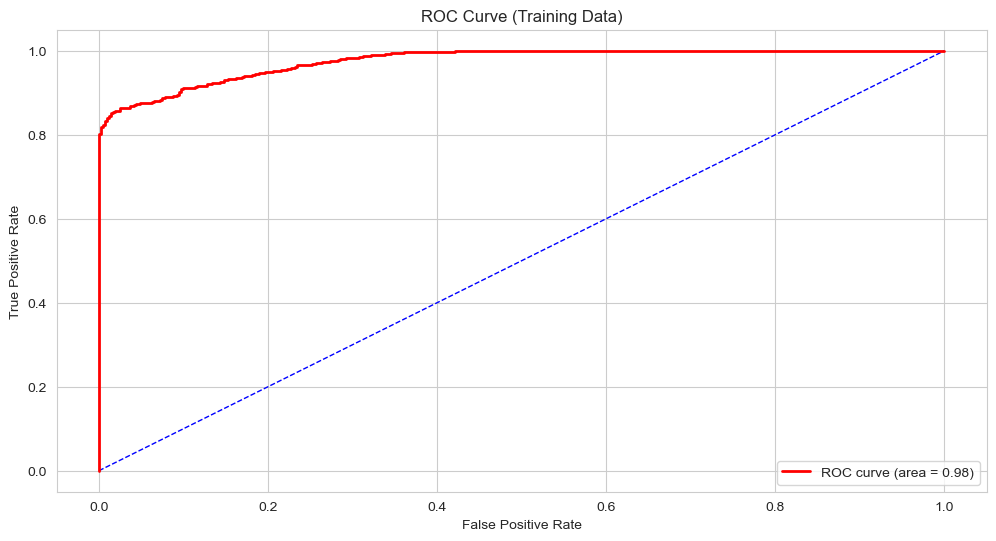

In [46]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

voting_clf.fit(X_train_scaled, y_train)

# Predict training probabilities
y_proba = voting_clf.predict_proba(X_train_scaled)[:, 1]

# Compute ROC
fpr, tpr, thresholds = roc_curve(y_train, y_proba)
roc_auc = auc(fpr, tpr)

print("Training AUC:", roc_auc)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')
# Plot ROC curve
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.legend(loc="lower right")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Training Data)")
plt.show()

---

## Part 5: Generate predictions on test set and evaluate performance

This section handles:
- Running prediction on trained algorithm
- Compute the accuracy score on algorithm
- Construct Confusion matrix and analysis them
- Construct ROC and Calculate AUC

### 5.1 Running Prediction on trained algorithm

In [49]:
voting_clf_prediction = voting_clf.predict(X_val_scaled)

### 5.2 Compute the accuracy score on algorithm

In [51]:
print(accuracy_score(y_val, voting_clf_prediction))

0.860730593607306


### 5.3 Construct Confusion matrix and analysis them

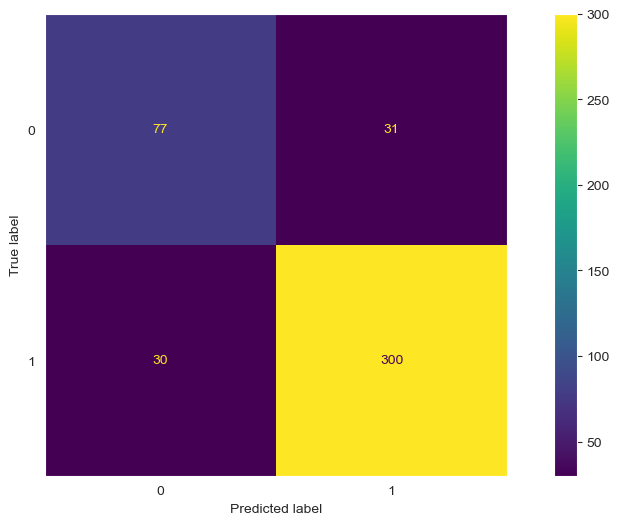

In [87]:
from sklearn.metrics import ConfusionMatrixDisplay
cmd = ConfusionMatrixDisplay.from_predictions(y_val,voting_clf_prediction)
cmd.ax_.grid(False)
plt.show() 

#### Of the 77 + 31 = 108 observations that did not have rainfall, 77/108 (**71.3%**) were correctly classified, 31/108 (**28.7%**) were not correctly classified, therefore our **True Negative Rate(TNR)** is 77/108(**71.3%**). 

#### Of the 30 + 300 = 330 observation that does have rainfall, 300/330 (**90.6%**) were correctly classified, and 30/330 (**8.4%**) were not correctly classified, therefore our **True Positive Rate(TPR)** is 90.6%


#### F1 Score

In [ ]:
from sklearn.metrics import f1_score

f1_score(y_val, voting_clf_prediction)
